<a href="https://colab.research.google.com/github/Kheiria-Hamayel/multimedia/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply DCT to an image

**Objective:** To visualize the importance of applying DCT to an image by changing the least important coefficients to zero.


---
DCT: is abbrviation of Discrete Cosine Transform, which is a technique for converting an image into parts of different values (frequencies). Where the frequencies with small values are less important, so it will be discarded. As the result of that the DCT is a lossy image compression.    


# The Task Beginning: 

1- Read an image into a matrix


---
Satrting by importing the necessary library


In [ ]:
import cv2 
from numpy import array
import numpy as np
import math
from scipy import fft
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

Reading the black and white image,
then converting it into matrix and print it.

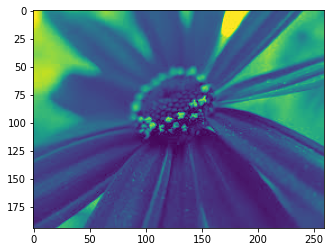

array([[254, 255, 254, ..., 160, 158, 155],
       [254, 255, 254, ..., 157, 155, 151],
       [254, 255, 254, ..., 152, 150, 147],
       ...,
       [ 34,  42,  55, ...,  52,  52,  52],
       [ 57,  57,  56, ...,  53,  52,  52],
       [ 57,  57,  56, ...,  53,  52,  52]], dtype=uint8)

In [ ]:
img =cv2.imread('download.jpg',cv2.IMREAD_GRAYSCALE) # read the image
plt.imshow(img) # Show the image
plt.show()
ar = array(img) #convert the image into matrix
ar # print the matrix



2-  Apply 2D-DCT to the matrix



In [ ]:
block = 8 #block size 
[rows , col ] = img.shape # this method returns the  # of rows and cols

H = rows
W = col
# convert the values into floats----------------------------
rows = np.float32(rows)
col = np.float32(col)


rows = math.ceil(rows/block)
col = math.ceil(col/block)

Rows = rows * block
Col = col * block

#-----------------------------------------------------
img_v2 = np.zeros((Rows, Col), dtype=float)
img_v2[:H , :W] = img
print(img_v2)
DCT = cv2.dct(img_v2)
print(DCT)
print("done")
img2 = fft.dctn(img,type=2)
print(img2)
print("done")

[[254. 255. 254. ...   0.   0.   0.]
 [254. 255. 254. ...   0.   0.   0.]
 [254. 255. 254. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[ 1.76661752e+04  8.57150870e+02  4.33019279e+03 ...  1.62440451e+01
  -1.34741188e+01 -2.50808964e+00]
 [ 7.06893250e+03  7.37085136e+01  1.93052532e+03 ...  2.70526875e+00
  -2.77296574e+00 -8.09889557e-01]
 [ 1.79066825e+02  8.52445494e+02 -1.48655000e+03 ... -9.34659206e+00
   2.41917245e+00  9.58684971e+00]
 ...
 [-1.38201314e+01 -5.44963255e+00  4.67294962e+00 ...  2.42874494e+00
   2.57310136e-01  8.67520679e-01]
 [ 7.99396369e+00  2.39401572e+00  1.28980811e+00 ... -1.79176021e+00
  -2.00247673e+00 -5.98156456e-01]
 [-9.88006283e+00 -1.85243430e+00 -8.67254918e+00 ... -2.10115674e+00
   2.02974140e+00  5.39807665e-01]]
done
[[ 1.62375120e+07  2.85259135e+05  3.15180613e+06 ...  2.39942669e+03
  -3.10155493e+03 -4.39974190e+03]
 [ 4.17309735e+06 -4.66375

Convert the last K coefficients to zero (multiply the last (in zigzag scan) DCT-Coefficients by zeros while all other coefficients are left the same).

In [ ]:
img3 = np.concatenate([np.diagonal(img2[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-img2.shape[0], img2.shape[0])])#for generating ZigZag
print(img3)

[ 1.62375120e+07  2.85259135e+05  4.17309735e+06 ... -1.16780193e+03
 -2.15295289e+02 -9.28810420e+02]


In [ ]:
k = 10
size = len(img3)
img3[-k:] = 0
img3[size-k-3:size]

array([-1266.82574026,   171.68644224,  -696.73014879,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ])

Inverting the ZigZag effect:

In [ ]:
row = 0
col = 0
print(Rows)
c = Col
print(Col)
i = 0
inv = np.zeros((Rows, Col), dtype=float)
def inversZigZag(arr):
  while (row != Rows and col != c):
    if (row == 0 and col == 0):
      inv[i] = img3[0]
      i = i+1
    else:
      fill_even_row()
      fill_odd_row()
#missing this part




  


200
264


 Apply inverse 2D-DCT transform to the modified DCT coefficients.

In [ ]:
# the image that will be in the function below is the one from inverting the ZigZag effect
img4 = fft.idctn(img3)
plt.imshow(img4) # Show the reconstructed image
plt.show()


for taking k = 20

In [ ]:
img3 = np.concatenate([np.diagonal(img2[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-img2.shape[0], img2.shape[0])])#for generating ZigZag
print(img3)
k = 20
size = len(img3)
img3[-k:] = 0
img3[size-k-3:size]

# applying the ZigZagInv

img3 = inversZigZag(img3)

img4 = fft.idctn(img3)
plt.imshow(img4) # Show the reconstructed image
plt.show()



for taking k = 60

In [ ]:
img3 = np.concatenate([np.diagonal(img2[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-img2.shape[0], img2.shape[0])])#for generating ZigZag
print(img3)
k = 60
size = len(img3)
img3[-k:] = 0
img3[size-k-3:size]

# applying the ZigZagInv

img3 = inversZigZag(img3)

img4 = fft.idctn(img3)
plt.imshow(img4) # Show the reconstructed image
plt.show()

increasing the K value casue increaing the compression degree where many values become zero.
As a result of that the reconstructed image become not clear each time we increasing k.


---
*Note: inversZigZag is not implemented and that's why i couldn't get the reconstructed images *


# References

https://www.math.cuhk.edu.hk/~lmlui/dct.pdf
